In [17]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [19]:
train.shape

(891, 12)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
print(f"Выживших: {train['Survived'].value_counts(normalize=True)[1] * 100:.2f}%")
print(f"Погибших: {train['Survived'].value_counts(normalize=True)[0] * 100:.2f}%")

Выживших: 38.38%
Погибших: 61.62%


В 3 классе наибольший процент погибших


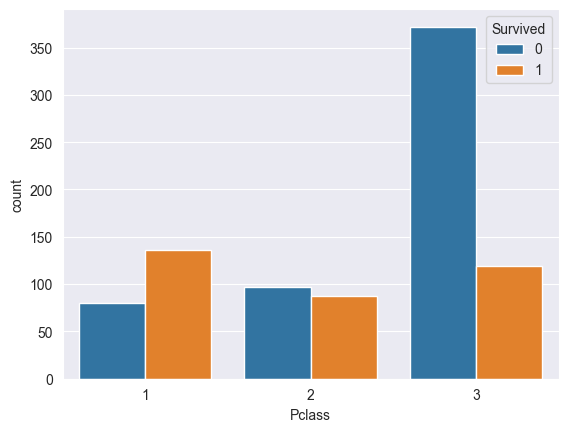

In [22]:
sns.countplot(x = train['Pclass'], hue=train['Survived'])
print("В 3 классе наибольший процент погибших")

Женщин выжило больше чем мужчин. Больше всего погибло мужчин


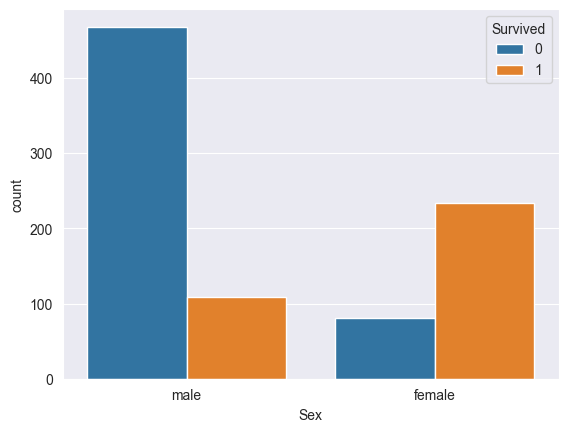

In [23]:
sns.countplot(x = train['Sex'], hue=train['Survived'])
print("Женщин выжило больше чем мужчин. Больше всего погибло мужчин")

Больше всего погибло взрослых


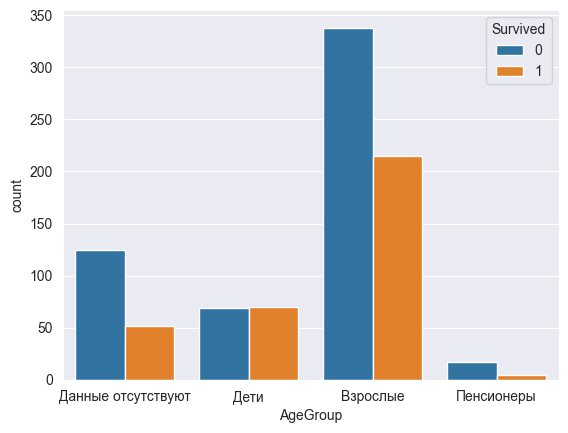

In [24]:
train_age = train.copy()

train_age['Age'] = train_age['Age'].fillna(-0.5)
bins = [-1, 0, 18, 60, np.inf]
labels = ['Данные отсутствуют', 'Дети', 'Взрослые', 'Пенсионеры']
train_age['AgeGroup'] = pd.cut(train_age['Age'], bins, labels=labels)
sns.countplot(x = train_age['AgeGroup'], hue=train['Survived'])
print("Больше всего погибло взрослых")

In [25]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
# группировка по классу и возрасту
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [31]:
# заполнение пропусков
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [32]:
# от категорильаных данных к числовым меткам
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [33]:
#удаляем всё остальное
def drop(train, test, bye = ['PassengerId', 'Name','SibSp',	'Parch','Ticket', 'Cabin']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [34]:
train, test = age_impute(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked'])
train, test = drop(train, test)

In [35]:
train

,Survived,Age,Fare,Age_Null_Flag,Pclass_3,Pclass_1,Pclass_2,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,0,22.00000,7.2500,0,True,False,False,True,False,True,False,False
1,1,38.00000,71.2833,0,False,True,False,False,True,False,True,False
2,1,26.00000,7.9250,0,True,False,False,False,True,True,False,False
3,1,35.00000,53.1000,0,False,True,False,False,True,True,False,False
4,0,35.00000,8.0500,0,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.00000,13.0000,0,False,False,True,True,False,True,False,False
887,1,19.00000,30.0000,0,False,True,False,False,True,True,False,False
888,0,25.14062,23.4500,1,True,False,False,False,True,True,False,False
889,1,26.00000,30.0000,0,False,True,False,True,False,False,True,False


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8227


In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix_and_report(y_pred, y_test):

    cm = confusion_matrix(y_test, y_pred)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, annot_kws={"size": 16})
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.title('Матрица ошибок')
    plt.show()


    report = classification_report(y_test, y_pred)
    print("Отчет классификации:")
    print(report)

In [38]:
y_pred = rf.predict(train.iloc[:, 1:])

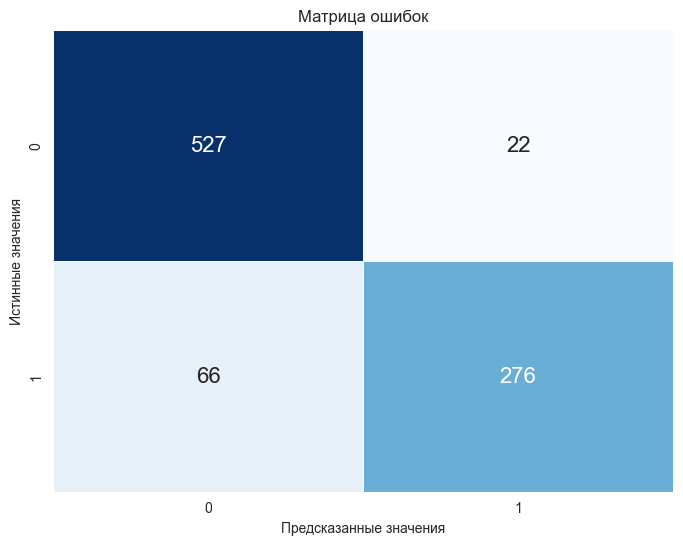

Отчет классификации:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       549
           1       0.93      0.81      0.86       342

    accuracy                           0.90       891
   macro avg       0.91      0.88      0.89       891
weighted avg       0.90      0.90      0.90       891



In [39]:
plot_confusion_matrix_and_report(y_pred,train.iloc[:, 0])

In [40]:
print("%.4f" % rf.oob_score_)

0.8227


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

# распределение для гиперпараметров
param_dist = {
    'n_estimators': scipy.stats.randint(1, 200),
    'max_depth': scipy.stats.randint(10, 100),
    'min_samples_split': scipy.stats.randint(2, 20),
    'min_samples_leaf': scipy.stats.randint(1, 10)
}

#экземпляр модели RandomForestClassifier
rf = RandomForestClassifier()

#объект RandomizedSearchCV с параметрами
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

#поиск наилучших гиперпараметров на обучающих данных
random_search.fit(train.iloc[:, 1:], train.iloc[:, 0])

# наилучшие гиперпараметры и результат
best_params = random_search.best_params_
best_score = random_search.best_score_

# Выведите наилучшие гиперпараметры и результат
print(f'Наилучшие гиперпараметры: {best_params}')
best_score_percent = best_score * 100
print(f'Наилучший результат: {best_score_percent:.2f}%')

Наилучшие гиперпараметры: {'max_depth': 84, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 164}
Наилучший результат: 82.38%


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10,25, 50, 75, 100, 150],
    'max_depth': [5,10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(train.iloc[:, 1:], train.iloc[:, 0])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_score_percent = best_score * 100
print(f'Наилучший результат {best_score_percent:.2f}% с параметрами {best_params}')

Наилучший результат 83.06% с параметрами {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [43]:
from sklearn.ensemble import RandomForestClassifier


rf_params = {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 75}

custom_rf_model = RandomForestClassifier(**rf_params)


custom_rf_model.fit(train.iloc[:, 1:], train.iloc[:, 0])

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=75)

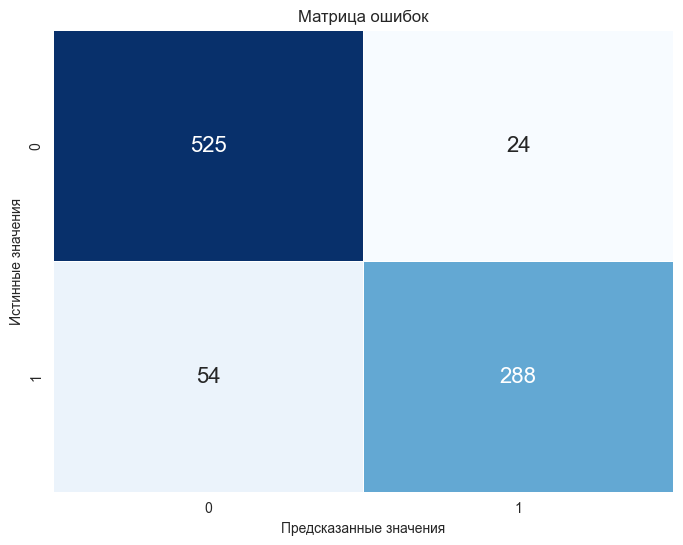

Отчет классификации:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       549
           1       0.92      0.84      0.88       342

    accuracy                           0.91       891
   macro avg       0.91      0.90      0.91       891
weighted avg       0.91      0.91      0.91       891



In [44]:
y_pred = custom_rf_model.predict(train.iloc[:, 1:])

plot_confusion_matrix_and_report(y_pred, train.iloc[:, 0])

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#  модель DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# сетка гиперпараметров
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,3, 5,10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,8],
    'max_features': ['sqrt', 'log2',None],
}


grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search_tree.fit(train.iloc[:, 1:], train.iloc[:, 0])


best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_


best_tree_model = DecisionTreeClassifier(**best_params_tree)
best_tree_model.fit(train.iloc[:, 1:], train.iloc[:, 0])


print(f'Наилучшие гиперпараметры для DecisionTreeClassifier: {best_params_tree}')
best_score_tree_percent = best_score_tree * 100
print(f'Наилучший результат: {best_score_tree_percent:.2f}%')

Наилучшие гиперпараметры для DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
Наилучший результат: 82.38%


In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=10)]
max_depth = [int(x) for x in np.linspace(10, 500, num=5)]
max_depth.append(None)
max_leaf_nodes = [int(i) for i in range(2, 100)]

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
}

rf_clf = RandomForestClassifier(random_state=0)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='accuracy',
    param_distributions=random_grid,
    n_iter=300,
    cv=5,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(train.iloc[:, 1:], train.iloc[:, 0])

rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(train.iloc[:, 1:], train.iloc[:, 0])

y_pred = rf_clf.predict(test)

Best paramters: {'n_estimators': 144, 'max_leaf_nodes': 88, 'max_depth': 500})


In [47]:
from ipywidgets import interact, widgets
import pandas as pd

def predict_person(model):
    @interact
    def get_input(
        Age=widgets.FloatSlider(min=0, max=120, value=20, description='Age:'),
        Fare=widgets.IntSlider(min=0, max=1000, value=100, description='Passenger fare:'),
        Age_Null_Flag=widgets.IntSlider(min=0, max=1, value=0, description='Age_Null_Flag:'),
        Pclass_3=widgets.IntSlider(min=0, max=1, value=0, description='Pclass_3:'),
        Pclass_1=widgets.IntSlider(min=0, max=1, value=0, description='Pclass_1:'),
        Pclass_2=widgets.IntSlider(min=0, max=1, value=0, description='Pclass_2:'),
        Sex_male=widgets.IntSlider(min=0, max=1, value=0, description='Sex_male:'),
        Sex_female=widgets.IntSlider(min=0, max=1, value=0, description='Sex_female:'),
        Embarked_S=widgets.IntSlider(min=0, max=1, value=0, description='Embarked_S:'),
        Embarked_C=widgets.IntSlider(min=0, max=1, value=0, description='Embarked_C:'),
        Embarked_Q=widgets.IntSlider(min=0, max=1, value=0, description='Embarked_Q:')
    ):
        data = {
            "Age": Age,
            "Fare": Fare,
            "Age_Null_Flag": Age_Null_Flag,
            "Pclass_3": Pclass_3,
            "Pclass_1": Pclass_1,
            "Pclass_2": Pclass_2,
            "Sex_male": Sex_male,
            "Sex_female": Sex_female,
            "Embarked_S": Embarked_S,
            "Embarked_C": Embarked_C,
            "Embarked_Q": Embarked_Q
        }

        y_pred = model.predict(pd.DataFrame(data, index=[0]))
        print(f"This Passenger is probably {'dead' if y_pred[0] == 0 else 'alive'}")

In [49]:
predict_person(rf_clf)

interactive(children=(FloatSlider(value=20.0, description='Age:', max=120.0), IntSlider(value=100, description…

In [57]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Загрузка данных "Boston Housing"
# Задача предсказать стоимость по параметрам
boston = fetch_openml(name='boston', version=1)

data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['target'] = boston.target

X = data.drop('target', axis=1)
y = data['target']

C:\Users\prokh\Downloads\Data_mining\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [58]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


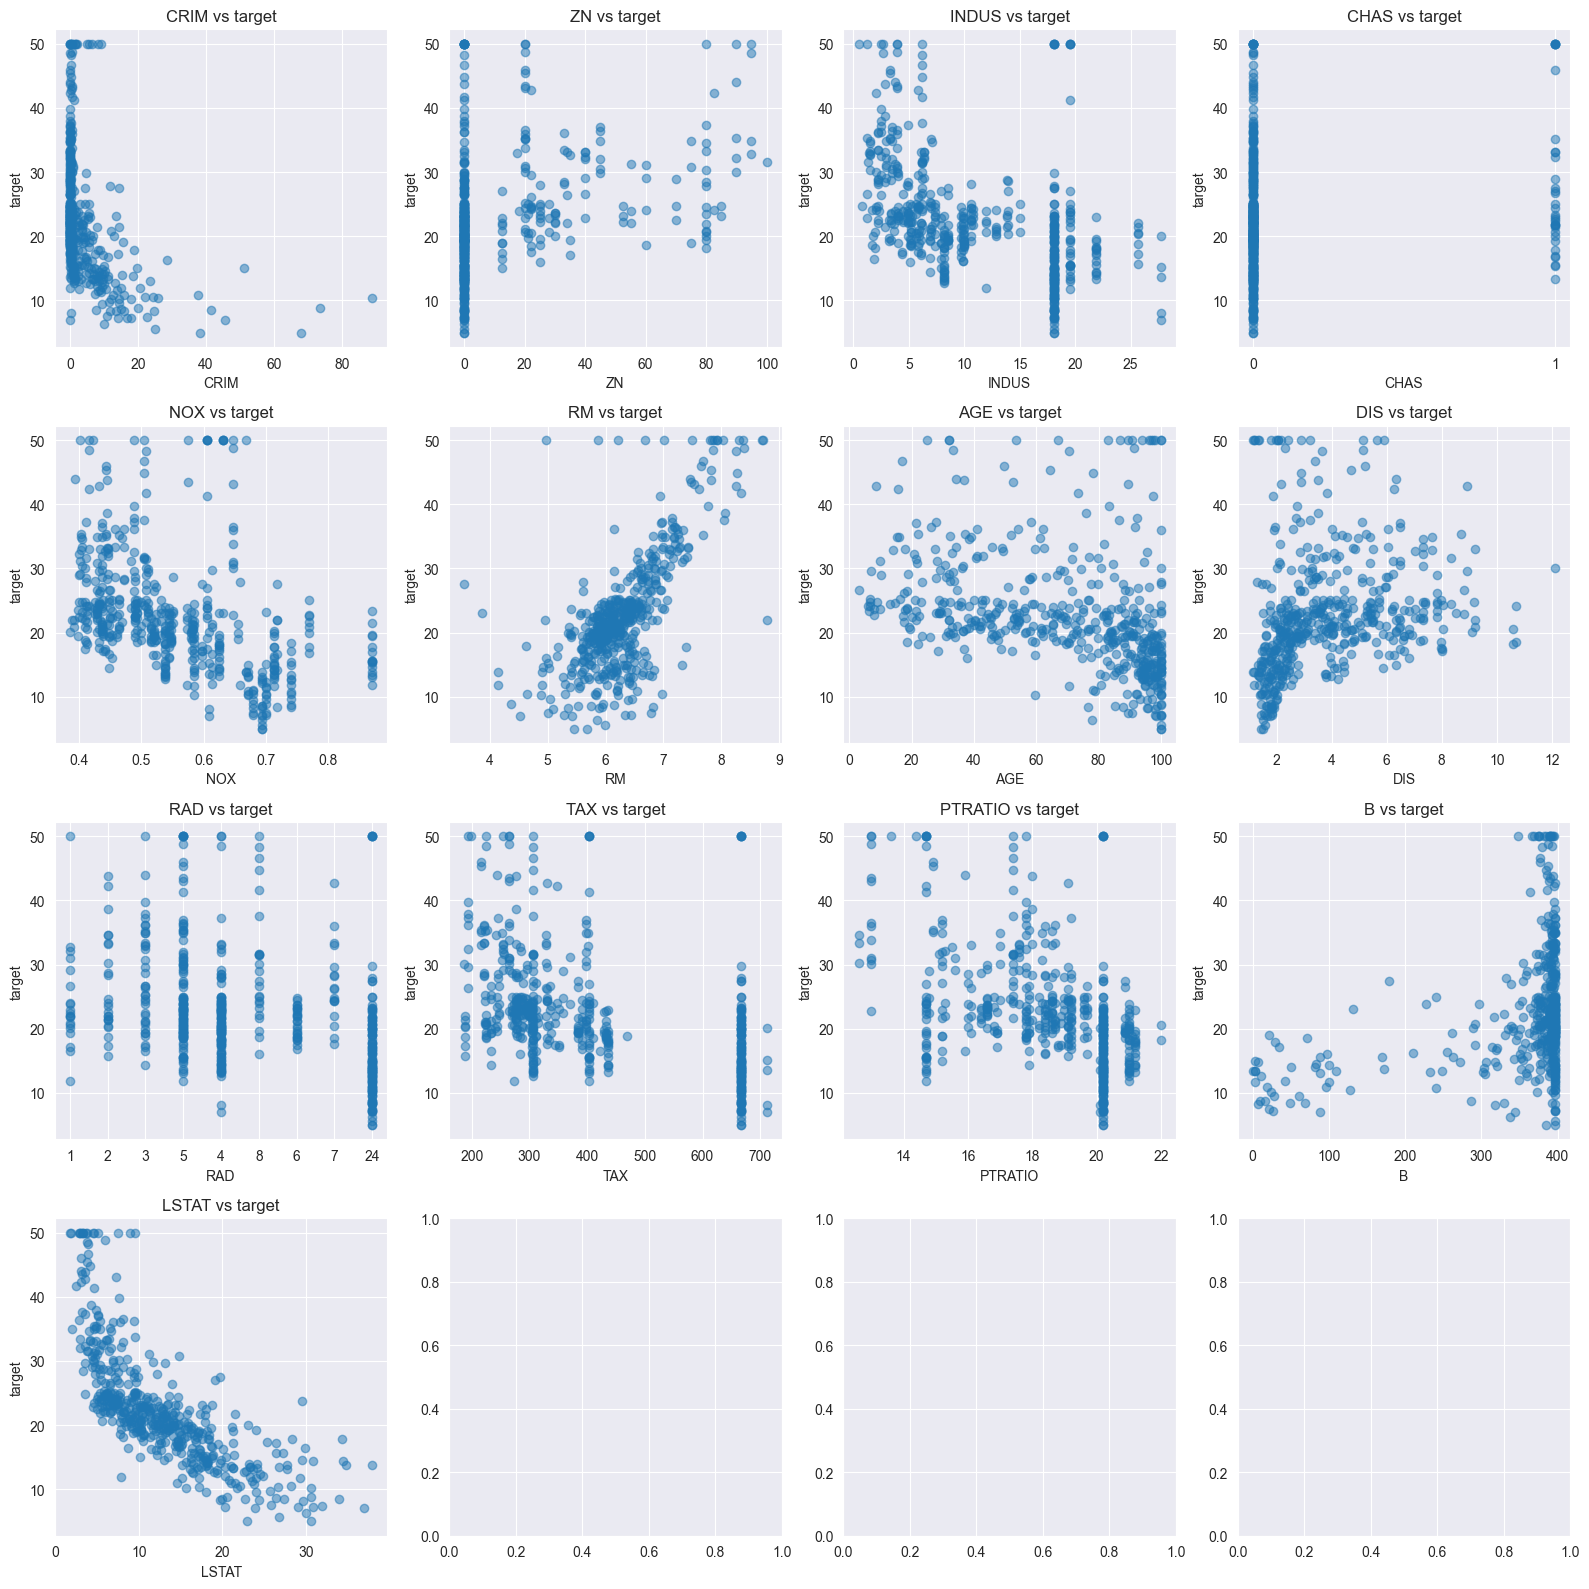

In [59]:
import matplotlib.pyplot as plt

# Отрисовка всех параметров
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i, column in enumerate(data.columns[:-1]):
    ax = axes[int(i / 4), i % 4]
    ax.scatter(data[column], data['target'], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('target')
    ax.set_title(f'{column} vs target')

plt.tight_layout()
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания на тестовом наборе данных
predictions = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 7.90
R-squared (R2): 0.89
